## Практическое занятие - Метод k-ближайших соседей для решения задачи классификации

Цель состоит в том, чтобы определить сегменты клиентов, которым может быть предоставлен кредит. Основная цель состоит в том, чтобы проанализировать и спрогнозировать, будет ли предоставление кредита конкретному лицу безопасным или нет, исходя из конкретных особенностей.

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Загрузите данные (файл train_knn.csv)**

In [2]:
# 1. Загрузка данных
df = pd.read_csv('train_knn.csv')

# Отображение первых нескольких строк
print(df.head())

# Информация о датасете
print(df.info())

# Статистическое описание числовых столбцов
print(df.describe())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

**2. Осуществите поиск пропущенных значений**

In [3]:
# Подсчет пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

# Процент пропущенных значений
missing_percentage = (missing_values / len(df)) * 100

print("\nПроцент пропущенных значений в каждом столбце:")
print(missing_percentage)


Количество пропущенных значений в каждом столбце:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Процент пропущенных значений в каждом столбце:
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


**3. Заполните пропуски в данных: для признаков Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History - модой, для LoanAmount - средним значением.**

In [4]:
# Заполнение пропусков модой для категориальных переменных
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Заполнение пропусков средним значением для LoanAmount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Проверка результатов
print("Количество пропущенных значений после заполнения:")
print(df.isnull().sum())


Количество пропущенных значений после заполнения:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-4-fdfe6c3baf7f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-4-fdfe6c3baf7f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

**4. Удалите признак Loan_ID**

In [5]:
# Удаление столбца Loan_ID
df = df.drop('Loan_ID', axis=1)

# Проверка, что столбец успешно удален
print("Столбцы в датасете после удаления Loan_ID:")
print(df.columns)

# Вывод первых нескольких строк для подтверждения
print("\nПервые несколько строк обновленного датасета:")
print(df.head())

Столбцы в датасете после удаления Loan_ID:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Первые несколько строк обновленного датасета:
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2         

#  Разведочный анализ данных

**5. Осуществите проверку дубликатов**

In [6]:
# Подсчет общего количества дубликатов
duplicates_count = df.duplicated().sum()

print(f"Общее количество дубликатов: {duplicates_count}")

# Если есть дубликаты, выводим их
if duplicates_count > 0:
    print("\nПримеры дубликатов:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head())

# Подсчет дубликатов по всем столбцам
print("\nКоличество дубликатов по каждому столбцу:")
for column in df.columns:
    dup_count = df.duplicated(subset=[column]).sum()
    if dup_count > 0:
        print(f"{column}: {dup_count}")


Общее количество дубликатов: 0

Количество дубликатов по каждому столбцу:
Gender: 612
Married: 612
Dependents: 610
Education: 612
Self_Employed: 612
ApplicantIncome: 109
CoapplicantIncome: 327
LoanAmount: 410
Loan_Amount_Term: 604
Credit_History: 612
Property_Area: 611
Loan_Status: 612


**6. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям разного пола**

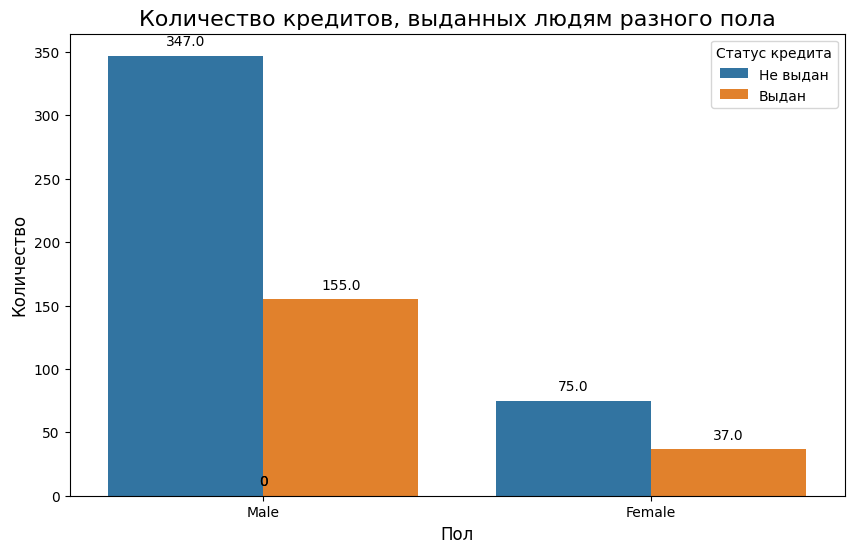

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df)

# Настройка заголовка и подписей осей
plt.title('Количество кредитов, выданных людям разного пола', fontsize=16)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление легенды
plt.legend(title='Статус кредита', labels=['Не выдан', 'Выдан'])

# Добавление количества над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Отображение диаграммы
plt.show()


**Conclusion:** Males tends to get more loan than females.

**7. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разным семейным положением**

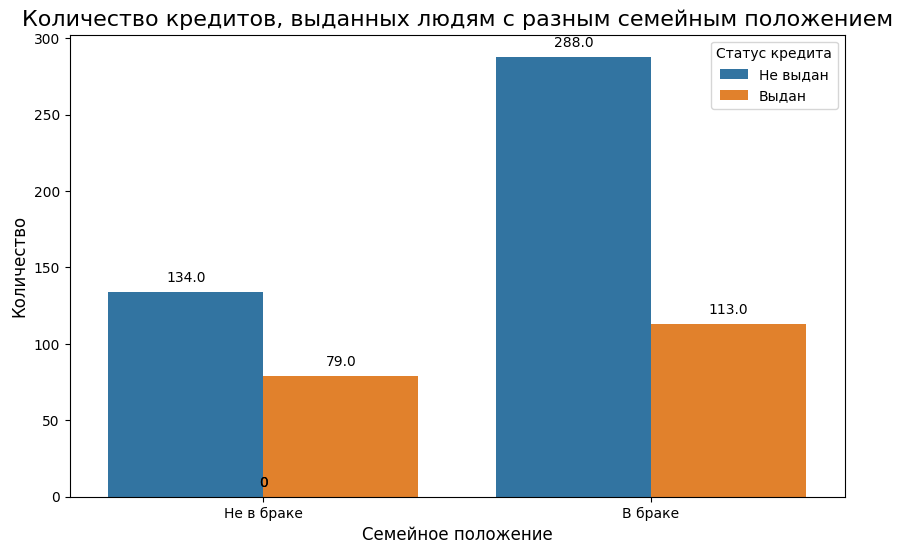

In [8]:
# Создание диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df)

# Настройка заголовка и подписей осей
plt.title('Количество кредитов, выданных людям с разным семейным положением', fontsize=16)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление легенды
plt.legend(title='Статус кредита', labels=['Не выдан', 'Выдан'])

# Изменение подписей на оси X
plt.xticks([0, 1], ['Не в браке', 'В браке'])

# Добавление количества над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Отображение диаграммы
plt.show()


**8. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разным уровнем образования**

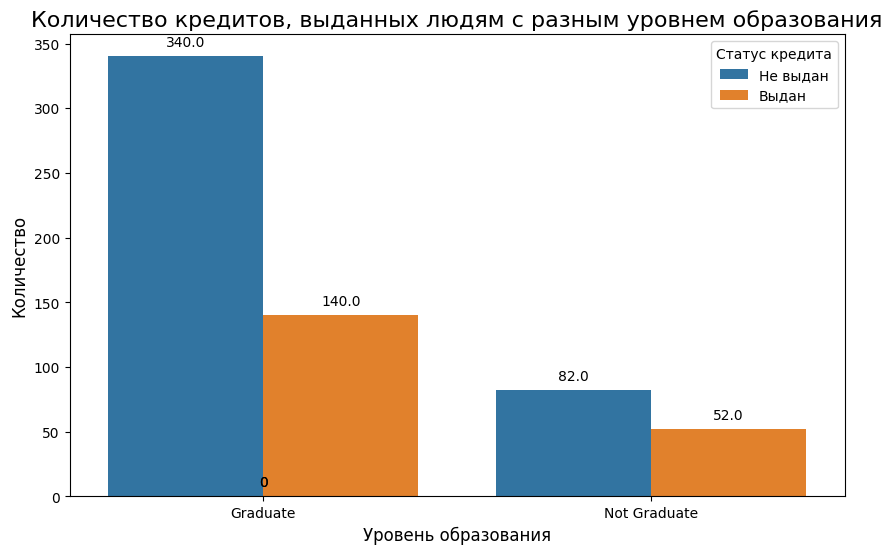

In [9]:
# Создание диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)

# Настройка заголовка и подписей осей
plt.title('Количество кредитов, выданных людям с разным уровнем образования', fontsize=16)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление легенды
plt.legend(title='Статус кредита', labels=['Не выдан', 'Выдан'])

# Добавление количества над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Отображение диаграммы
plt.show()


**9. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разной самозанятостью**

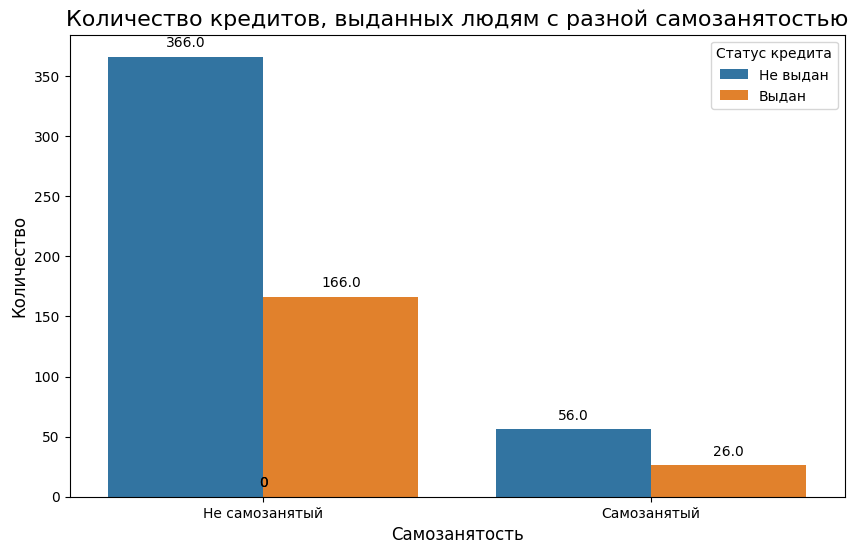

In [10]:
# Создание диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

# Настройка заголовка и подписей осей
plt.title('Количество кредитов, выданных людям с разной самозанятостью', fontsize=16)
plt.xlabel('Самозанятость', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление легенды
plt.legend(title='Статус кредита', labels=['Не выдан', 'Выдан'])

# Изменение подписей на оси X
plt.xticks([0, 1], ['Не самозанятый', 'Самозанятый'])

# Добавление количества над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Отображение диаграммы
plt.show()


**10. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разной кредитной историей**

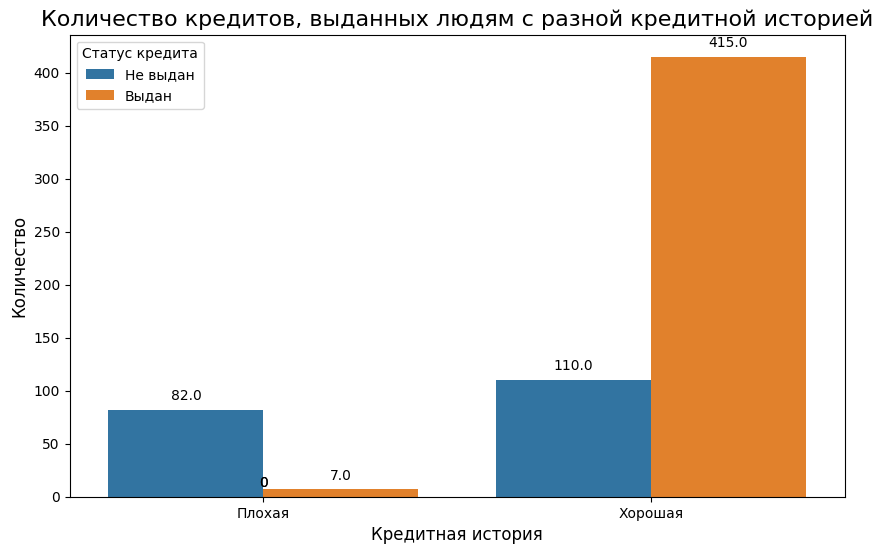

In [11]:
# Создание диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

# Настройка заголовка и подписей осей
plt.title('Количество кредитов, выданных людям с разной кредитной историей', fontsize=16)
plt.xlabel('Кредитная история', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление легенды
plt.legend(title='Статус кредита', labels=['Не выдан', 'Выдан'])

# Изменение подписей на оси X
plt.xticks([0, 1], ['Плохая', 'Хорошая'])

# Добавление количества над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Отображение диаграммы
plt.show()


**11. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям, проживающим в разной местности**

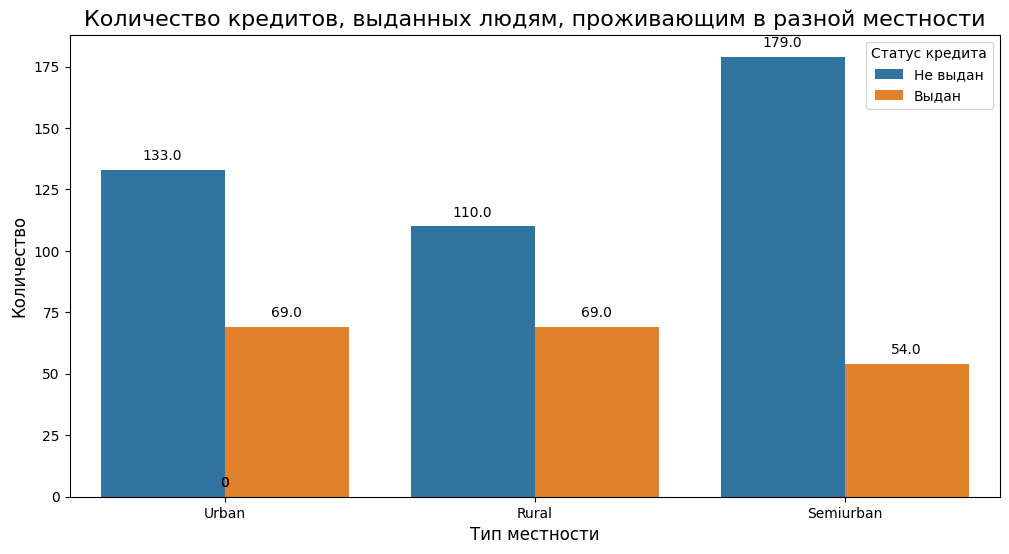

In [13]:
# Создание диаграммы
plt.figure(figsize=(12, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

# Настройка заголовка и подписей осей
plt.title('Количество кредитов, выданных людям, проживающим в разной местности', fontsize=16)
plt.xlabel('Тип местности', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление легенды
plt.legend(title='Статус кредита', labels=['Не выдан', 'Выдан'])

# Добавление количества над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Отображение диаграммы
plt.show()


**11. Посчитайте и проанализируйте долю значений целевой переменной от общего объема выборки**

Количество и доля значений целевой переменной:
Y: 422 (68.73%)
N: 192 (31.27%)


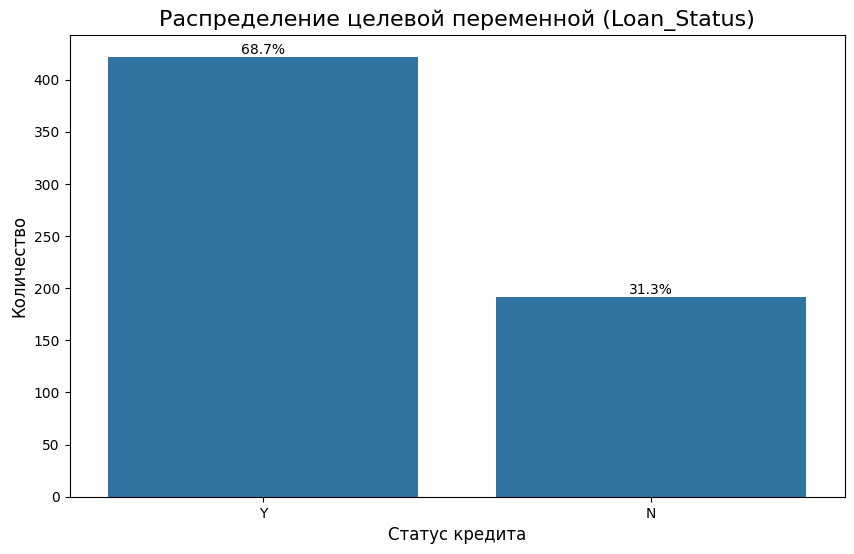

In [14]:
# Подсчет количества каждого значения целевой переменной
loan_status_counts = df['Loan_Status'].value_counts()

# Подсчет доли каждого значения
loan_status_percentages = df['Loan_Status'].value_counts(normalize=True) * 100

# Вывод результатов
print("Количество и доля значений целевой переменной:")
for status, count in loan_status_counts.items():
    percentage = loan_status_percentages[status]
    print(f"{status}: {count} ({percentage:.2f}%)")

# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Распределение целевой переменной (Loan_Status)', fontsize=16)
plt.xlabel('Статус кредита', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавление процентов над столбцами
total = len(df['Loan_Status'])
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


**12. С помощью sns.distplot постройте распределение для признака ApplicantIncome**

<ipython-input-15-ec2c2b01121f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], kde=True, rug=True)


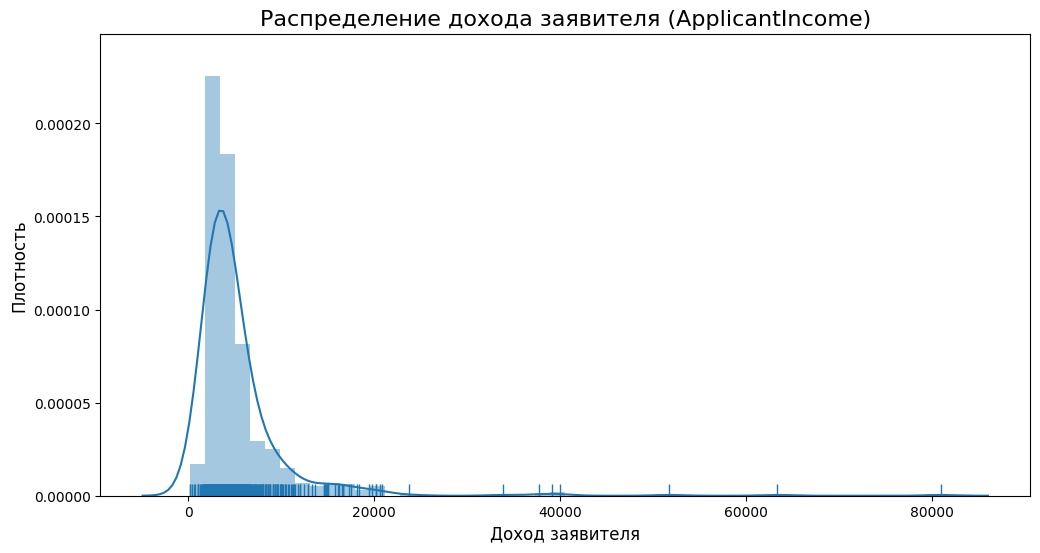

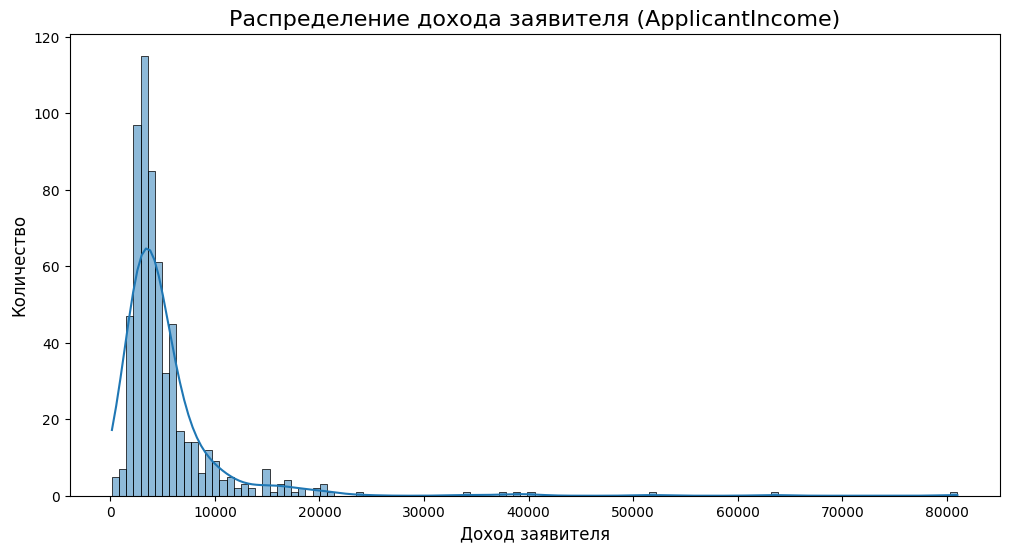

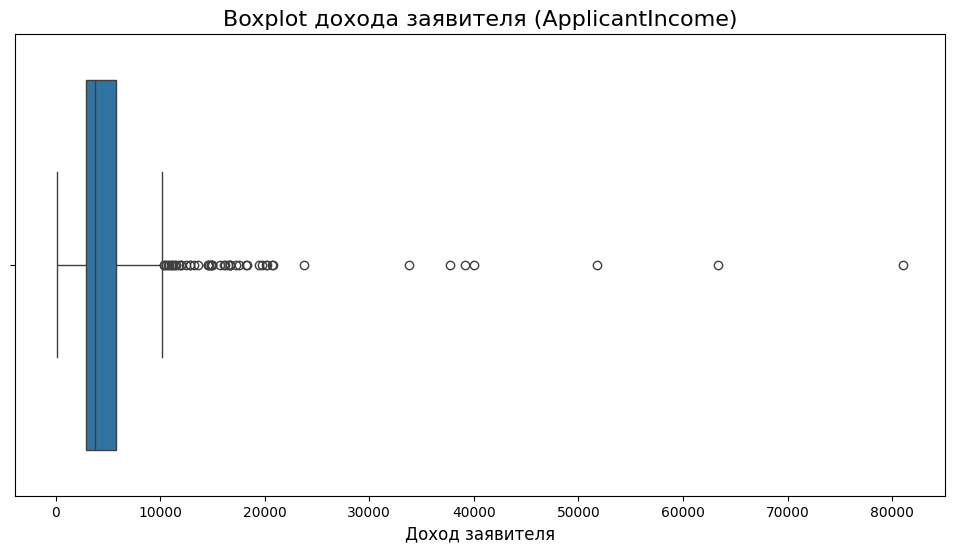

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вариант 1: Используя устаревший distplot
plt.figure(figsize=(12, 6))
sns.distplot(df['ApplicantIncome'], kde=True, rug=True)
plt.title('Распределение дохода заявителя (ApplicantIncome)', fontsize=16)
plt.xlabel('Доход заявителя', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.show()

# Вариант 2: Используя современный histplot
plt.figure(figsize=(12, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Распределение дохода заявителя (ApplicantIncome)', fontsize=16)
plt.xlabel('Доход заявителя', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

# Дополнительно: Построение boxplot для лучшего понимания выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Boxplot дохода заявителя (ApplicantIncome)', fontsize=16)
plt.xlabel('Доход заявителя', fontsize=12)
plt.show()

# Статистическое описание
print(df['ApplicantIncome'].describe())


**13. Удалите выбросы из данных**

Размер датасета до удаления выбросов: (361, 12)
Выбросы удалены из столбца ApplicantIncome
Выбросы удалены из столбца CoapplicantIncome
Выбросы удалены из столбца LoanAmount
Выбросы удалены из столбца Loan_Amount_Term
Выбросы удалены из столбца Credit_History
Размер датасета после удаления выбросов: (358, 12)


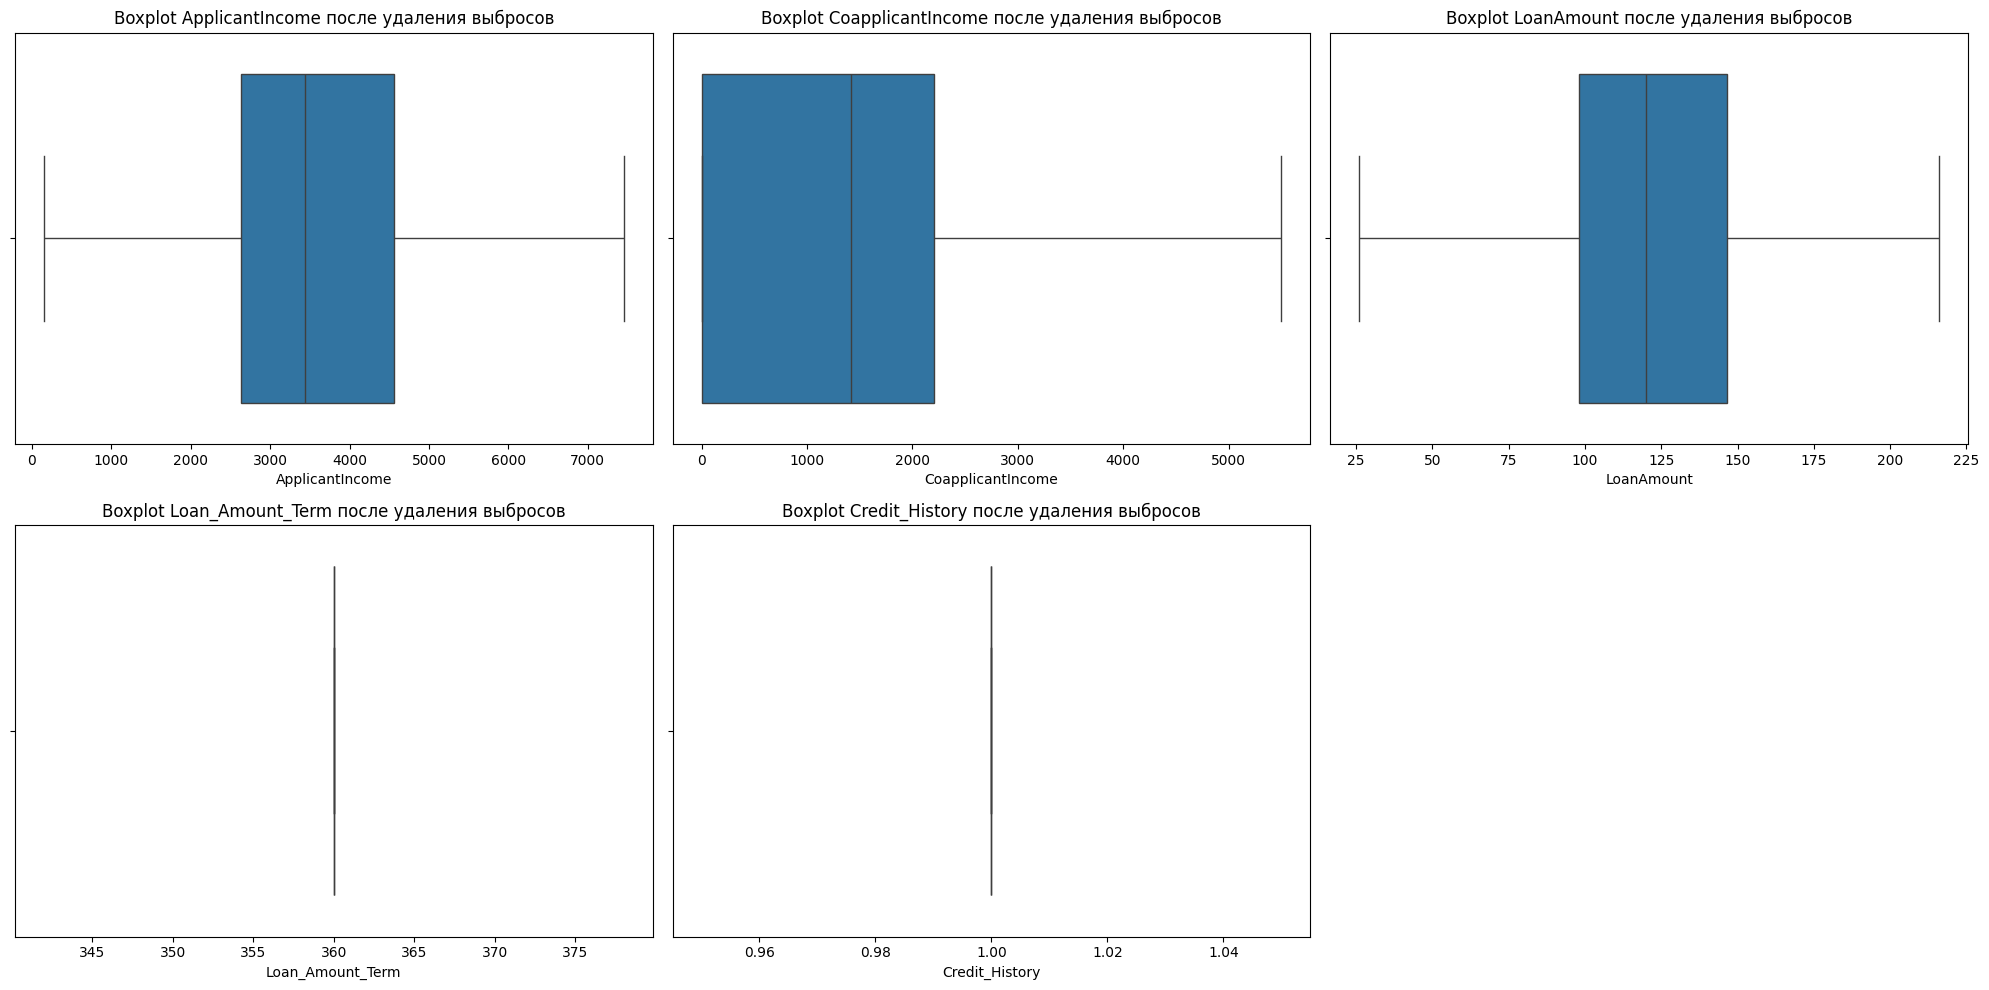


Статистическое описание ApplicantIncome после удаления выбросов:
count     358.000000
mean     3678.033520
std      1373.306013
min       150.000000
25%      2626.750000
50%      3438.500000
75%      4563.000000
max      7451.000000
Name: ApplicantIncome, dtype: float64

Статистическое описание CoapplicantIncome после удаления выбросов:
count     358.000000
mean     1342.491955
std      1339.906758
min         0.000000
25%         0.000000
50%      1414.000000
75%      2206.750000
max      5500.000000
Name: CoapplicantIncome, dtype: float64

Статистическое описание LoanAmount после удаления выбросов:
count    358.000000
mean     121.464687
std       37.212307
min       26.000000
25%       98.000000
50%      120.000000
75%      146.412162
max      216.000000
Name: LoanAmount, dtype: float64

Статистическое описание Loan_Amount_Term после удаления выбросов:
count    358.0
mean     360.0
std        0.0
min      360.0
25%      360.0
50%      360.0
75%      360.0
max      360.0
Name: Loan_

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Список числовых столбцов для обработки
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Вывод информации о размере датасета до удаления выбросов
print(f"Размер датасета до удаления выбросов: {df.shape}")

# Удаление выбросов
for column in numeric_columns:
    df = remove_outliers(df, column)
    print(f"Выбросы удалены из столбца {column}")

# Вывод информации о размере датасета после удаления выбросов
print(f"Размер датасета после удаления выбросов: {df.shape}")

# Построение боксплотов после удаления выбросов
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols+2)//3, ncols=3, figsize=(20, 5*((num_cols+2)//3)))
axes = axes.flatten()  # Преобразование 2D массива осей в 1D для удобства индексации

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot {column} после удаления выбросов')
    axes[i].set_xlabel(column)

# Удаление лишних подграфиков
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Вывод статистического описания после удаления выбросов
for column in numeric_columns:
    print(f"\nСтатистическое описание {column} после удаления выбросов:")
    print(df[column].describe())


Размер датасета до удаления выбросов: (358, 12)
Выбросы удалены из столбца ApplicantIncome
Выбросы удалены из столбца CoapplicantIncome
Выбросы удалены из столбца LoanAmount
Размер датасета после удаления выбросов: (358, 12)


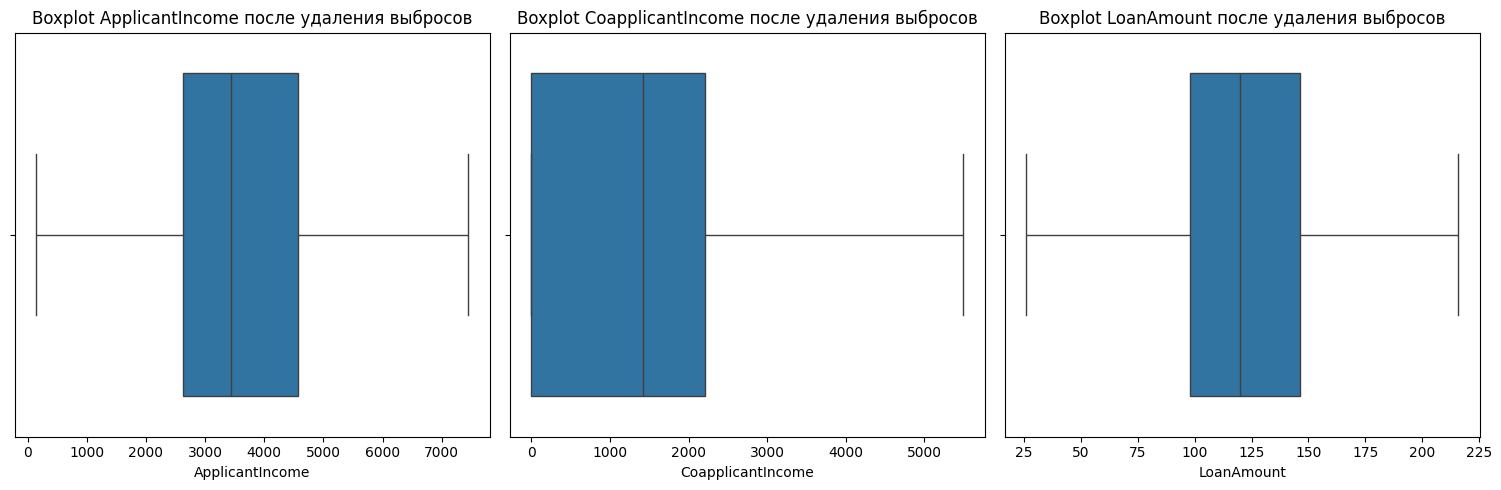


Статистическое описание ApplicantIncome после удаления выбросов:
count     358.000000
mean     3678.033520
std      1373.306013
min       150.000000
25%      2626.750000
50%      3438.500000
75%      4563.000000
max      7451.000000
Name: ApplicantIncome, dtype: float64

Статистическое описание CoapplicantIncome после удаления выбросов:
count     358.000000
mean     1342.491955
std      1339.906758
min         0.000000
25%         0.000000
50%      1414.000000
75%      2206.750000
max      5500.000000
Name: CoapplicantIncome, dtype: float64

Статистическое описание LoanAmount после удаления выбросов:
count    358.000000
mean     121.464687
std       37.212307
min       26.000000
25%       98.000000
50%      120.000000
75%      146.412162
max      216.000000
Name: LoanAmount, dtype: float64


In [21]:
# 13v2
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Список числовых столбцов для обработки
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Вывод информации о размере датасета до удаления выбросов
print(f"Размер датасета до удаления выбросов: {df.shape}")

# Удаление выбросов
for column in numeric_columns:
    df = remove_outliers(df, column)
    print(f"Выбросы удалены из столбца {column}")

# Вывод информации о размере датасета после удаления выбросов
print(f"Размер датасета после удаления выбросов: {df.shape}")

# Построение боксплотов после удаления выбросов
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column} после удаления выбросов')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Вывод статистического описания после удаления выбросов
for column in numeric_columns:
    print(f"\nСтатистическое описание {column} после удаления выбросов:")
    print(df[column].describe())


**14. Постройте и визуализируйте с помощью sns.heatmap матрицу корреляций**

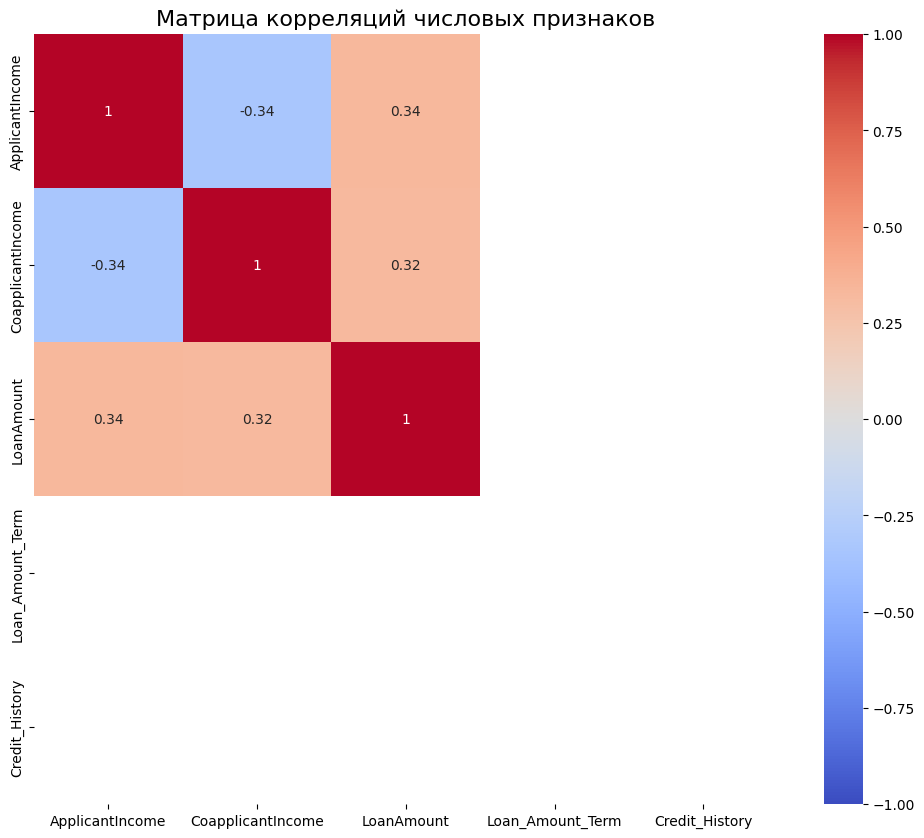


Матрица корреляций:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.342869    0.335172   
CoapplicantIncome        -0.342869           1.000000    0.324423   
LoanAmount                0.335172           0.324423    1.000000   
Loan_Amount_Term               NaN                NaN         NaN   
Credit_History                 NaN                NaN         NaN   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome                 NaN             NaN  
CoapplicantIncome               NaN             NaN  
LoanAmount                      NaN             NaN  
Loan_Amount_Term                NaN             NaN  
Credit_History                  NaN             NaN  


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Выбор только числовых столбцов
numeric_df = df.select_dtypes(include=[np.number])

# Вычисление матрицы корреляций
correlation_matrix = numeric_df.corr()

# Настройка размера фигуры
plt.figure(figsize=(12, 10))

# Построение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Настройка заголовка
plt.title('Матрица корреляций числовых признаков', fontsize=16)

# Отображение графика
plt.show()

# Вывод матрицы корреляций в числовом формате
print("\nМатрица корреляций:")
print(correlation_matrix)


# Построение модели

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

**15. Переконвертируйте следующие категориальные данные в целочисленные значения**

In [27]:
#Convert some object data type to int
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}

In [32]:
# Применение маппинга к соответствующим столбцам
df['Gender'] = df['Gender'].map(gender)
df['Married'] = df['Married'].map(yes_no)
df['Dependents'] = df['Dependents'].map(dependents)
df['Education'] = df['Education'].map(education)
df['Self_Employed'] = df['Self_Employed'].map(yes_no)
df['Property_Area'] = df['Property_Area'].map(property)  # Изменено с 'Property' на 'Property_Area'
df['Loan_Status'] = df['Loan_Status'].map(output)

# Проверка результатов
print(df.head())
print("\nИнформация о датафрейме после конвертации:")
print(df.info())

# Проверка на наличие пропущенных значений после конвертации
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     NaN      NaN         NaN        NaN            NaN             5849   
1     NaN      NaN         NaN        NaN            NaN             4583   
2     NaN      NaN         NaN        NaN            NaN             3000   
3     NaN      NaN         NaN        NaN            NaN             2583   
4     NaN      NaN         NaN        NaN            NaN             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              1            1  
1              2            0  
2              1    

**16. Назначьте целевой переменной Loan_Status, удалите её из данных. Разбейте выборку на обучающую и тестовую в соотношении 75% на 25%.**

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

# Назначение целевой переменной
y = df['Loan_Status']

# Удаление целевой переменной из данных
X = df.drop('Loan_Status', axis=1)

# Разбиение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Вывод информации о размерах выборок
print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер обучающей выборки целевой переменной (y_train):", y_train.shape)
print("Размер тестовой выборки целевой переменной (y_test):", y_test.shape)

# Проверка баланса классов в обучающей и тестовой выборках
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))


Размер обучающей выборки (X_train): (268, 11)
Размер тестовой выборки (X_test): (90, 11)
Размер обучающей выборки целевой переменной (y_train): (268,)
Размер тестовой выборки целевой переменной (y_test): (90,)

Распределение классов в обучающей выборке:
Loan_Status
1    0.817164
0    0.182836
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Loan_Status
1    0.811111
0    0.188889
Name: proportion, dtype: float64


**17. Создайте и обучите модель KNeighborsClassifier с параметром n_neighbors = 5**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Проверка на наличие пропущенных значений
print("Количество пропущенных значений в каждом столбце:")
print(X_train.isnull().sum())

# Создание пайплайна для обработки данных и обучения модели
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средним
    ('scaler', StandardScaler()),  # Масштабирование признаков
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # KNN классификатор
])

# Обучение модели на тренировочных данных
pipeline.fit(X_train, y_train)

print()
print(f"Количество соседей (n_neighbors): {pipeline.named_steps['classifier'].n_neighbors}")
print(f"Количество признаков в обучающей выборке: {X_train.shape[1]}")
print(f"Количество образцов в обучающей выборке: {X_train.shape[0]}")
print()

Количество пропущенных значений в каждом столбце:
Gender               268
Married              268
Dependents           268
Education            268
Self_Employed        268
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

Количество соседей (n_neighbors): 5
Количество признаков в обучающей выборке: 11
Количество образцов в обучающей выборке: 268



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


**18. Выполните предсказания модели на тестовой выборке**

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Точность модели на тестовой выборке: 0.7889

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.81      0.97      0.88        73

    accuracy                           0.79        90
   macro avg       0.40      0.49      0.44        90
weighted avg       0.65      0.79      0.72        90


Распределение правильных и неправильных предсказаний:
Правильно
True     0.788889
False    0.211111
Name: proportion, dtype: float64


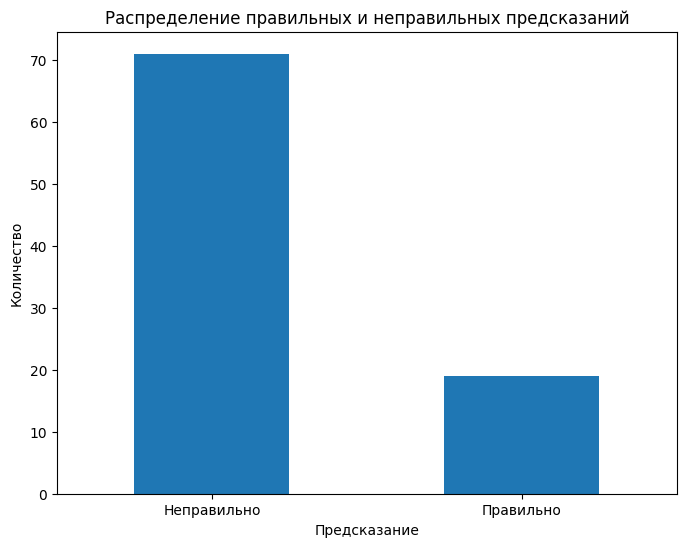

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Выполнение предсказаний на тестовой выборке
y_pred = pipeline.predict(X_test)

# Создание DataFrame с результатами
results_df = pd.DataFrame({
    'Фактическое значение': y_test,
    'Предсказанное значение': y_pred
})

# Вычисление точности модели
accuracy = (y_test == y_pred).mean()
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")

# Вывод отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# Анализ распределения правильных и неправильных предсказаний
results_df['Правильно'] = y_test == y_pred
print("\nРаспределение правильных и неправильных предсказаний:")
print(results_df['Правильно'].value_counts(normalize=True))

# Визуализация распределения правильных и неправильных предсказаний
plt.figure(figsize=(8, 6))
results_df['Правильно'].value_counts().plot(kind='bar')
plt.title('Распределение правильных и неправильных предсказаний')
plt.ylabel('Количество')
plt.xlabel('Предсказание')
plt.xticks([0, 1], ['Неправильно', 'Правильно'], rotation=0)
plt.show()


**19. Выведите accuracy_score модели для тестовой выборки**

In [40]:
from sklearn.metrics import accuracy_score

# Выполнение предсказаний на тестовой выборке
y_pred = pipeline.predict(X_test)

# Вычисление accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy score модели на тестовой выборке: {accuracy:.4f}")


Accuracy score модели на тестовой выборке: 0.7889


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


**20. Постройте и выведите матрицу ошибок (Confusion Matrix)**

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


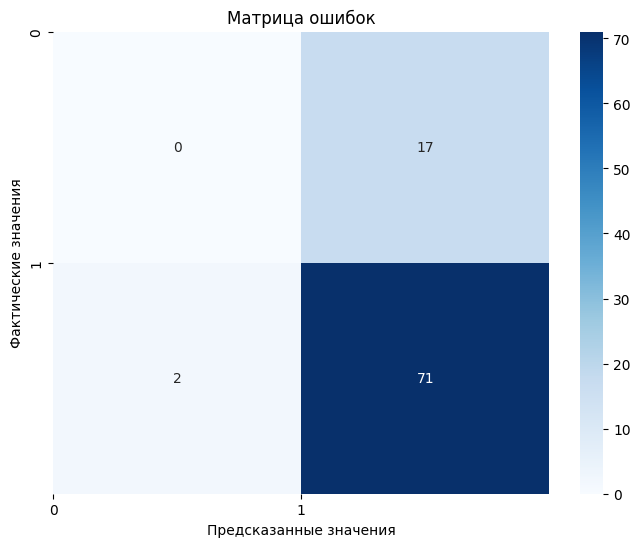

Матрица ошибок:
[[ 0 17]
 [ 2 71]]


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Выполнение предсказаний на тестовой выборке (если еще не сделано)
y_pred = pipeline.predict(X_test)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')

# Определение меток классов
class_labels = pipeline.named_steps['classifier'].classes_
plt.yticks(range(len(class_labels)), class_labels)
plt.xticks(range(len(class_labels)), class_labels)

plt.show()

# Вывод матрицы ошибок в текстовом формате
print("Матрица ошибок:")
print(cm)
